# ABSTRACT


<div style="text-align: justify;">
Este conjunto de datos contiene información del precio de ventas de casas en el condado de King, Washington durante los años 2014 y 2015. Puede ser útil para diversos fines. Por ejemplo, un agente inmobiliario podría utilizar esta técnica para estimar el precio de una casa basándose en su tamaño en pies cuadrados, lo que puede ayudar a determinar el precio de venta adecuado para una propiedad en particular. También podría ser utilizado por un comprador o vendedor de viviendas para comprender mejor el mercado inmobiliario y tomar decisiones con un criterio objetivo.


Además, los datos y las técnicas de análisis de este conjunto de datos también podrían ser utilizados por profesionales de bienes raíces, urbanistas y planificadores urbanos para comprender mejor los patrones de venta y los precios de las viviendas en una determinada área geográfica. Esto podría ayudar en la planificación de la expansión urbana y el desarrollo de nuevas viviendas en una zona determinada.

En resumen, puede ser útil para aquellos que están interesados en el mercado inmobiliario y quieren utilizar los datos para tomar decisiones informadas en la compra, venta o desarrollo de propiedades.
</div>

#  DEFINICIÓN DE OBJETIVOS

<div style="text-align: justify;">
En este caso, el objetivo será comunicar los resultados del análisis de datos de los precios de las viviendas en King. Nos centraremos en las variables más importantes que influyen en el precio de venta. Analizaremos si existe algun tipo de relación de una variable respecto a otra. Si este tipo de dependencia existe, veremos de que forma se da esta relación.</div>

# CONTEXTO COMERCIAL

<div style="text-align: justify;">El siguiente trabajo podría ser utilizado por diversas empresas y organizaciones que operan en el mercado inmobiliario, como agentes inmobiliarios, desarrolladores de viviendas, planificadores urbanos y empresas de bienes raíces. El dataset contiene información sobre las ventas de casas en esta área geográfica, incluyendo el precio de venta, el tamaño de la casa, la ubicación, el número de habitaciones y baños, entre otros datos.

**Actuaremos como un científico de datos en una gran inmobiliaria de EEUU que trabaja en conjunto con el area de ventas. Se analizaran los precios de las casas en california como así tambien las caracteristicas de las mismas.**</div>


# CONTEXTO ANALITICO


<div style="text-align: justify;">
 Se enfocará el analisis en la identificación de los factores que tienen el mayor impacto en el precio de venta de las casas, como el número de habitaciones, la ubicación, el tamaño del terreno, entre otros. Esto puede ayudar a los actores del mercado inmobiliario a tomar decisiones informadas sobre la compra, venta y desarrollo de propiedades en el condado de King, Washington.

El problema principal, de la mano de nuestro objetivo principal será **construir un modelo de aprendizaje supervisado que nos permita predecir cuanto será el precio de venta de una determinada casa**, de acuerdo a las caracteristicas de la misma.
</div>


# PREGUNTAS A RESPONDER / HIPOTESIS




1.   ¿De que categoría son las casas que mas se venden? ¿Las que menos se venden?
2.   ¿Las casas con una buena vista son las mas costosas?
3.   ¿Cuales son las casas mas económicas? ¿Que caracteristicas tienen?

En base a estas preguntas, intentaremos descubrir aquellas variables que mayor impacto tengan en el precio de una casa.




# SECCION 1 - DATA ACQUISITION

# DATASET

<div style="text-align: justify;">
El conjunto de datos que se utilizará contiene información del precio de ventas de casas en el condado de King, Washington durante los años 2014 y 2015.

El mismo contiene 21 columnas:

  - ID: Correlativo númerico que distingue cada una de las casas vendidas.
  - Date: Fecha en la cual fue vendida la casa.
  - **Price**: Precio de venta de la casa (en dólares norteamericanos).
  - Bedrooms: Número de cuartos en la casa.
  - Bathrooms: Número de baños disponibles en la casa, donde un valor de 0.5 representa un baño con inodoro pero sin ducha.
  - Sqft_living: Número de pies cuadrados del espacio habitable de la casa.
  - Sqft_lot: Pies cuadrados del espacio total del terreno donde se ubica la casa.
  - Floors: Cantidad de pisos en la casa.
  - Waterfront: Variable que indica la presencia o no de vista al mar en la casa.
  - View: Índice del 0 al 4 que indica que tan buena es la vista de la propiedad.
  - Condition: Índice del 1 al 5 para calificar la condición actual de la casa.
  - Grade: Índice del 1 al 13, el cuál califica el nivel de calidad de construcción de la casa.
  - Sqft_above: Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo.
  - Sqft_basement: Los pies cuadrados del espacio interior de la casa. que está por debajo del nivel del suelo.
  - Yr_built: El año en fue construida la casa.
  - Yr_renovated: Año de la última renovación de la casa.
  - Zipcode: Código postal del areá donde se encuentra la casa.
  - Lat: Latitud de la ubicación de la casa.
  - Long: Longitud de la ubicación de la casa.
  - Sqft_living15: Los pies cuadrados de espacio habitable de la casa interior para los 15 vecinos más cercanos.
  - Sqft_lot15: Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.
</div>




# IMPORTACIÓN DE LIBRERIAS

- Pandas: Para manipulación y análisis de datos.
- Numpy: Para operaciones numéricas y matemáticas.
- Matplotlib: Para gráficos y visualizaciones.
- Seaborn: Para gráficos estadísticos y mejoras visuales.
- scikit-learn (sklearn): Para el aprendizaje automático (machine learning)
- Mlxtend: Para selección de características y otras funciones de aprendizaje automático.


==================================================================================================================

- pd.set_option('max_columns', None): Con esta linea de código mostraremos la totalidad de las columnas del dataset
- from prettytable import PrettyTable: Configuramos un formato predeterminado para imprimir datos tabulares de manera más atractiva y legible en la consola  

In [1]:
#Tratamiento de datos:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from prettytable import PrettyTable 

#Graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Configurar pandas para no mostrar valores en notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import locale

#Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # Sequential Forward Selection
from sklearn.linear_model import LinearRegression

#Modelado y métricas
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Optimización de hiperparametros 
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Ruta de acceso al archivo localmente
ruta_archivo = 'C:/Users/TGD Company/Documents/Data_science/Trabajo_final/kc_house_data.csv' 

In [3]:
# Leer el archivo csv en un DataFrame de pandas
df = pd.read_csv(ruta_archivo)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# SECCION 2 - EXPLORATORY DATA ANALYSIS

In [5]:
# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_explore(df):
   
    print( 'Shape:', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

In [6]:
df_explore(df)

Shape: (21613, 21)
+---------------+---------+----------+-------+--------+-----------------+
|     Column    |   Type  | Non-Null | Nulls | Unique |     Example     |
+---------------+---------+----------+-------+--------+-----------------+
|       id      |  int64  |  21613   |   0   | 21436  |    7129300520   |
|      date     |  object |  21613   |   0   |  372   | 20141013T000000 |
|     price     | float64 |  21613   |   0   |  4028  |     221900.0    |
|    bedrooms   |  int64  |  21613   |   0   |   12   |        3        |
|   bathrooms   | float64 |  21613   |   0   |   29   |       1.0       |
|  sqft_living  |  int64  |  21613   |   0   |  1038  |       1180      |
|    sqft_lot   |  int64  |  21613   |   0   |  9782  |       5650      |
|     floors    | float64 |  21613   |   0   |   6    |       1.0       |
|   waterfront  |  int64  |  21613   |   0   |   1    |        0        |
|      view     |  int64  |  21613   |   0   |   4    |        0        |
|   condition   |  

In [7]:
#Formateamos los tipos de bathrooms y floors. Ya que deberían ser numeros enteros. 
df["bathrooms"] = df["bathrooms"].astype(int)
df["floors"] = df["floors"].astype(int)

In [8]:
df.duplicated().any()

False

**Observacion:** No tenemos valores nulos ni tampoco filas duplicadas. 

Debido a que no realizaremos ningún analisis enfocado en fechas, **la columna "date" será eliminada del dataset**

In [9]:
df.drop(["date", "id"], axis=1, inplace=True)


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

La columna "date" ha sido eliminada correctamente. 

**Estadística descriptiva:**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,1.75,0.73,0.00,1.00,2.00,2.00,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.45,0.55,1.00,1.00,1.00,2.00,3.00
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21613.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00


<div style="text-align: justify;">
A simple vista, podemos observar que el rango de precios es muy variables. Tenemos casas cuyo precio de venta es 75.000 dolares, mientras que la más costosa supera los 7 millones de dolares. Cabe destacar que el 75% de las casas no superan los 645.000 dólares, por lo que existe una minoría de casas que presentan precios muy elevados respecto a la gran mayoria. 

En promedio, el precio de venta ronda los 540.000 dolares, las casas cuentan con 3 habitaciones, 2 baños y 1 piso.

**OBSERVACIÓN 1:** Hay casas sin habitaciones y/o sin baño. Supondremos que minimamente, una casa debe contar con un baño. Aceptaremos valores ceros en la cantidad de habitaciones para incluir aquellas viviendas de tipo "monoambiente". Por lo tanto, para la cantida de baños, reemplazaremos los valores ceros con la mediana de dicha columna.  </div>

In [12]:
mediana_bathrooms = int(df["bathrooms"].median())
mediana_bathrooms

2

Reemplazamos los valores de baños = 0, por la mediana de esta columna

In [13]:
df["bathrooms"] = df["bathrooms"].replace({0: mediana_bathrooms})

In [14]:
#Verificamos que se hayan eliminado con éxito
print(df["bathrooms"].unique())
print(df["bathrooms"].describe())

[1 2 3 4 5 6 8 7]
count   21613.00
mean        1.76
std         0.73
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         8.00
Name: bathrooms, dtype: float64


**OBSERVACION 2:** Hay por lo menos una casa donde se indicó que posee 33 habitaciones. Analizaremos la variable en cuestión para determinar si se trata de algún posible error en la fuente de datos.

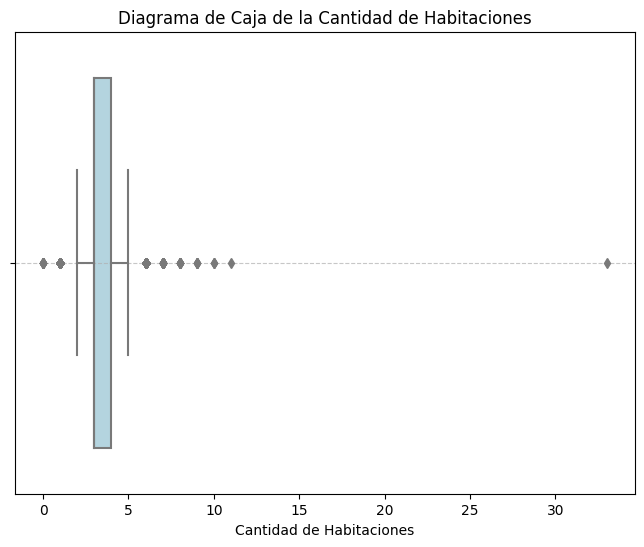

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["bedrooms"], color='lightblue')
plt.xlabel("Cantidad de Habitaciones")
plt.title("Diagrama de Caja de la Cantidad de Habitaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [16]:
df[df["bedrooms"]==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.00,33,1,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


Una casa de 33 habitaciones y un baño, no parece ser un dato lógico. Lo trataremos como un **outlier** y lo eliminaremos de nuestro dataset original para no distorsionar los resultados. 


In [17]:
df[df["bedrooms"]>6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,1950000.00,7,3,4640,15235,2,0,1,3,11,2860,1780,1965,2003,98040,47.57,-122.23,3230,20697
1135,420000.00,7,3,2940,8624,1,0,0,3,8,1690,1250,1977,0,98155,47.76,-122.31,1850,8031
1241,350000.00,7,3,2800,9569,1,0,2,3,7,1400,1400,1963,0,98056,47.51,-122.18,2150,7333
1660,490000.00,8,5,2800,2580,2,0,0,3,8,1880,920,1997,0,98122,47.61,-122.30,1800,2580
3721,884900.00,7,4,5370,10800,1,0,0,3,8,5370,0,1967,0,98040,47.54,-122.22,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,539000.00,7,2,2620,6890,2,0,0,4,7,2620,0,1961,0,98007,47.61,-122.13,2070,7910
18975,1240000.00,7,5,6630,13782,2,0,0,3,10,4930,1700,2004,0,98006,47.54,-122.12,4470,8639
19254,660000.00,10,3,2920,3745,2,0,0,4,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745
19302,575000.00,8,3,3840,15990,1,0,0,3,7,2530,1310,1961,0,98034,47.71,-122.21,1380,8172


Tenemos 62 casas con una cantidad mayor a 6 habitaciones. Las cuales a simple vista, considerando el precio y la cantidad de baños, puden tratarse de casas de gran tamaño. Por lo que las mantendremos en nuestro análisis. 

In [18]:
indice_eliminar = df[df["bedrooms"]==33].index

In [19]:
df = df.drop(indice_eliminar)

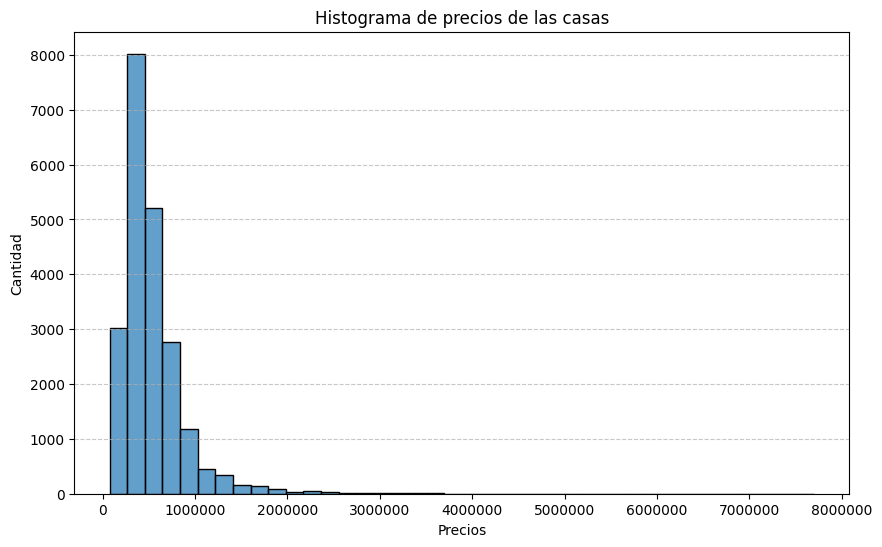

In [20]:
#Histograma de precios
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="price", fill="lightblue", alpha=0.7, bins=40)

# Personalizar el gráfico
plt.title("Histograma de precios de las casas")
plt.xlabel("Precios")
plt.ylabel("Cantidad")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Eliminar notación científica del eje x
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: locale.format_string("%.0f", x, grouping=True)))
# Mostrar el gráfico
plt.show()

Los datos están sesgados a la izquierda. Es decir, la gran mayoría de las casas que se venden, se venden a menos de un millon de dolares. Mientras que hay muy pocas que se venden por encima del millón de dolares.

Veamos como se comporta el precio, respecto a algunas de las features. Para ello, en un primer lugar realizaremos la matriz de correlación para identificar aquellas features que más correlación presentan entre ellas y en particular, con la variable "price". 

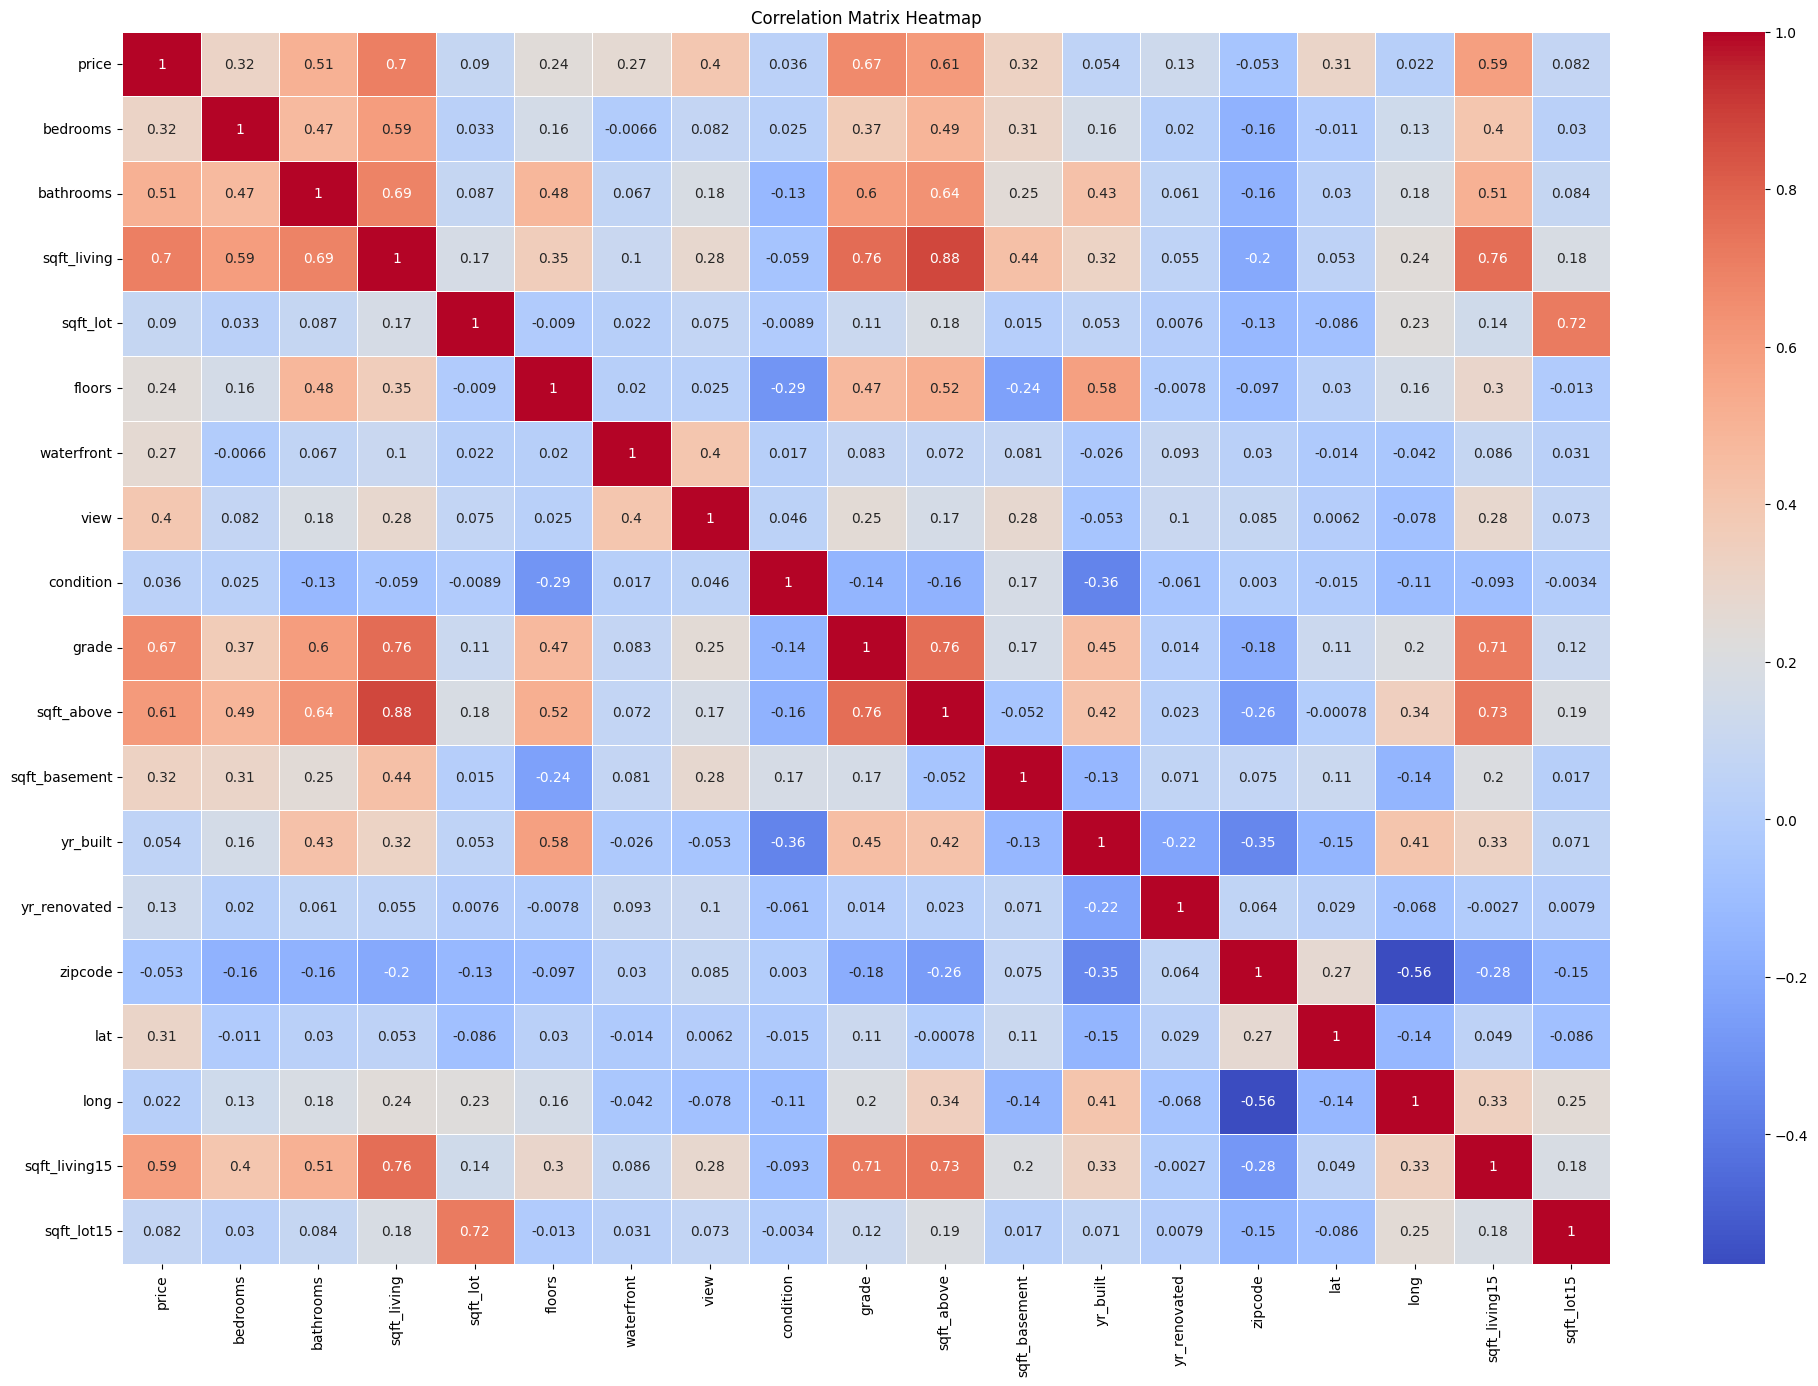

In [21]:
#Matriz de correlación
fig, ax = plt.subplots(figsize = (24, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [22]:
df.corr()['price'].sort_values(ascending =False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.51
view             0.40
sqft_basement    0.32
bedrooms         0.32
lat              0.31
waterfront       0.27
floors           0.24
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
Name: price, dtype: float64

La variable que presenta mayor relación lineal con el precio de venta de las casas es Sqft_living (el número de pies cuadrados del espacio habitable de la casa).

También se observa que hay algunas correlaciones altas entre las variables explicativas como Sqft_living(el número de pies cuadrados del espacio habitable de la casa) y Sqft_above (Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo).

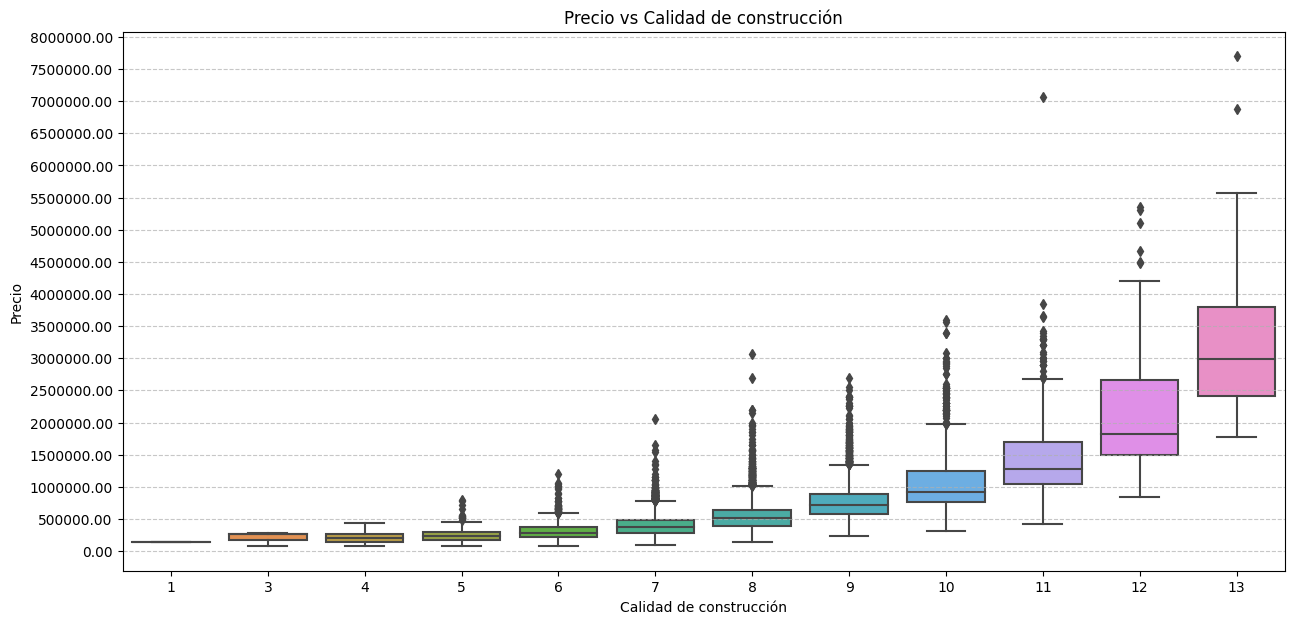

In [64]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df["grade"], y=df["price"])
plt.xlabel("Calidad de construcción")
plt.ylabel("Precio")
plt.title("Precio vs Calidad de construcción")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Eliminar notación científica del eje y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: locale.format_string("%.2f", x, grouping=True)))

#Eliminar notación científica del eje y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Establecer la escala de 250,000 en 250,000 para el eje y
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=500000))

plt.show()

Teniendo en cuenta que "grade" es un índice del 1 al 13 que califica el nivel de calidad de construcción de la casa, podemos observar que respecto a la calidad, el precio mantiene su media hasta una calidad grado 7. Luego, comienza a aumentar levemente la media a medida que la calidad aumenta. 
Se observan valores por encima del limite superior de cada boxplot. Esto no necesariamente implica que sean outliers, ya que independientemente de la calidad de consutricción, estas casas podrían tener características unicas y privilegiadas, lo que justificaría los precios altos para cada nivel. 

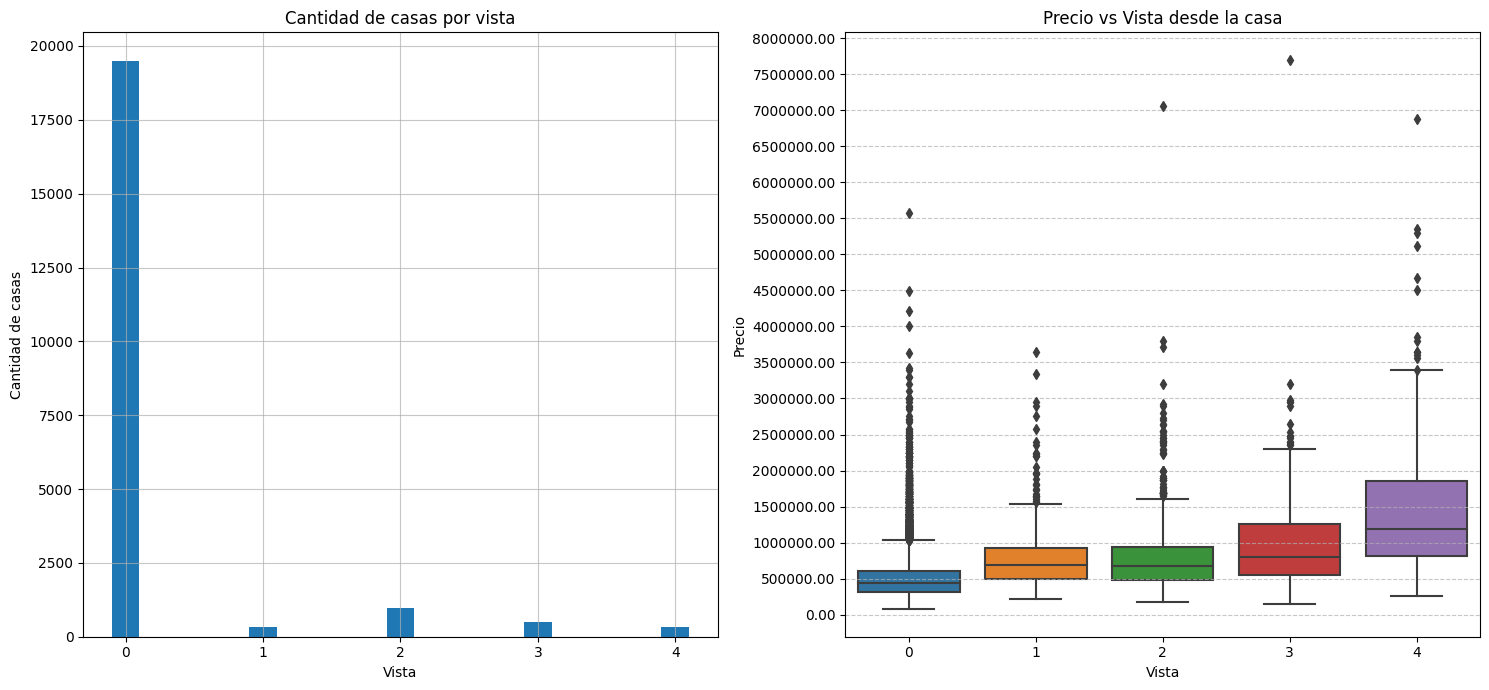

In [24]:
#Analizo la cantidad de casas de cada vista y como se comporta el precio

cantidad_por_vista = df["view"].value_counts()
cantidad_por_vista = cantidad_por_vista.sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
# grafico 1>
ax1.bar(cantidad_por_vista.index, cantidad_por_vista.values, width=0.2, align="center")
ax1.set_xlabel("Vista")
ax1.set_ylabel("Cantidad de casas")
ax1.set_title("Cantidad de casas por vista")
ax1.grid(alpha=0.7)

# grafico 2>
sns.boxplot(x=df["view"], y=df["price"], ax=ax2)
ax2.set_xlabel("Vista")
ax2.set_ylabel("Precio")
ax2.set_title("Precio vs Vista desde la casa")
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: locale.format_string("%.2f", x, grouping=True)))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=500000))

fig.tight_layout()
plt.show()

La gran mayoría de las casas están clasificadas con una categoría de vista "0". Respecto al precio, las pocas casas cuya vista es mayor a 2, poseen una media en el precio más elevada que en el resto de las casas. Esto debe surgir por la ubicación privilegiada. Que a pesar de la calidad de construcción que tenga, le aumenta su precio de venta. 

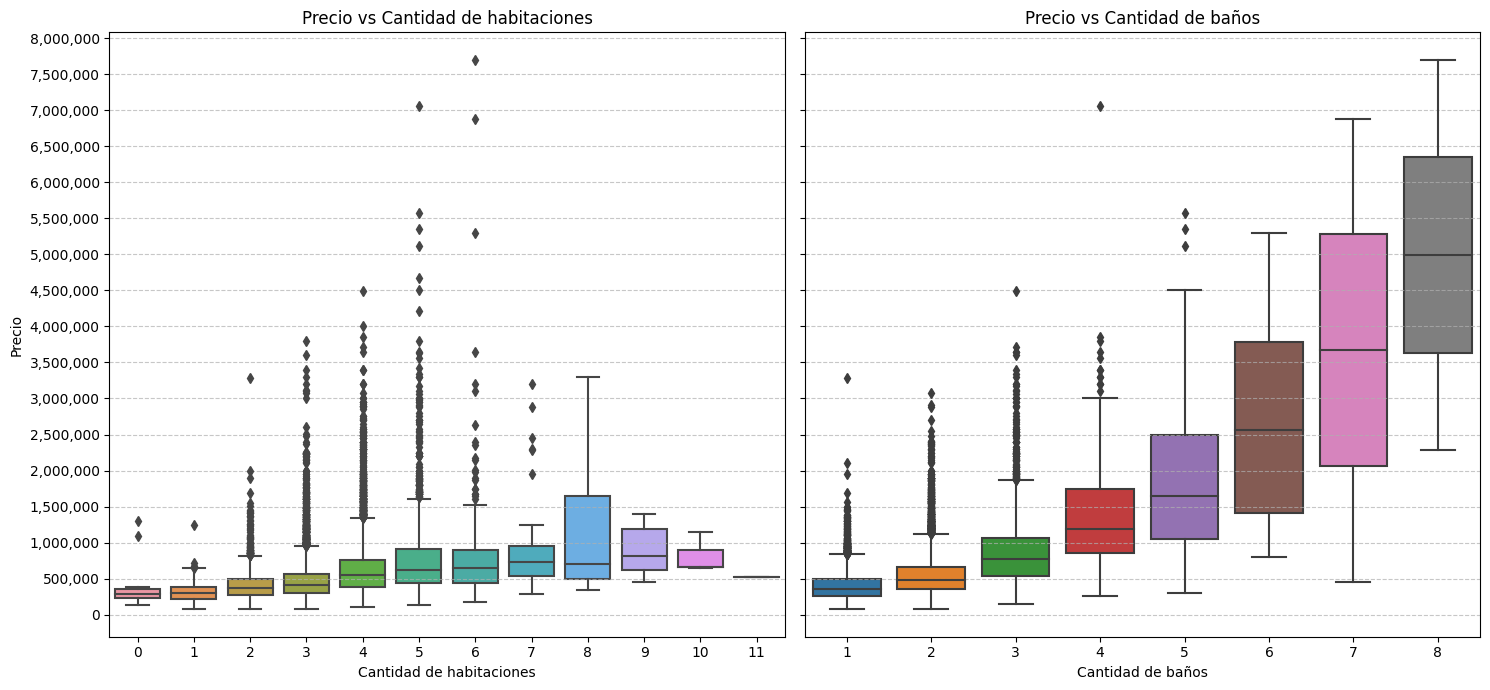

In [25]:
#Analizamos los baños y las habitaciones respecto al precio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
sns.boxplot(x=df["bedrooms"], y=df["price"], ax=ax1)
ax1.set_xlabel("Cantidad de habitaciones")
ax1.set_ylabel("Precio")
ax1.set_title("Precio vs Cantidad de habitaciones")
ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: locale.format_string("%.2f", x, grouping=True)))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(base=500000))
sns.boxplot(x=df["bathrooms"], y=df["price"], ax=ax2)
ax2.set_xlabel("Cantidad de baños")
ax2.set_ylabel("")
ax2.set_title("Precio vs Cantidad de baños")
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: locale.format_string("%.2f", x, grouping=True)))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=500000))
# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

Para la cantidad de habitaciones y la cantidad de baños, sucede algo parecido a la calidad de la construcción. Si bien se cumple la correlación positiva del precio con ambas variables, la media del precio aumenta de manera más exponencial respecto a la cantidad de baños.

# CONCLUSIONES EDA

1.   ¿De que categoría son las casas que mas se venden? ¿Las que menos se venden?
2.   ¿Las casas con una buena vista son las mas caras?
3.   ¿Cuales son las casas mas baratas? ¿Que caracteristicas tienen?

**Respuestas:**
<div style="text-align: justify;">
La gran mayoría de las casas vendidas se concentran en la vista de calidad "0".
Esto es debido a que la categoría cero posee en promedio el precio de venta mas bajo.

En las vistas 1,2 y 3 la media del precio es muy parecida, mientras que para la vista numero 4 se observa un claro aumento en la media del precio de venta. Por lo tanto, podemos afirmar y validar que la vista de una casa de King tiene una correlación positiva (0,40) respecto al precio. A su vez, basandonos en el primer grafico, podemos afirmar que las cantidades de casas que se venden con una vista privilegiada son menores a las cantidades de casa vendidas con vista calidad 0,1,2 y 3.

La categoría de construcción de cada casa se representa mediante un índice del 1 al 13. Donde 1 es el nivel mas bajo en cuanto a categoria y 13 es la categoria mas alta.

La mayoría de las casas se concentran en las categorías siete, ocho y nueve. Respecto al precio de venta, se puede apreciar un pequeño crecimiento en la mediana del precio de venta en las casas con mayor categoría de construcción, sin embargo, hay ciertas categorías que engloban muy poca cantidad de casas.

Si bien en un principio resultaba lógico pensar que las casas más baratas serían las que peores vistas tengan y las que estaban construidas con materiales de no tan buena categoría, el EDA permitió confirmar esto.

# ENCODING

El proceso de encoding será omitido ya que desde un principio en nuestro dataset no tenemos variables categóricas que necesiten ser codificadas.

## TECNICAS DE SELECCION Y REDUCCION DE FEATURES

Con el objetivo de reducir la dimensionalidad del dataset, aplicaremos:
- PCA (Principal Component Analysis)
- Secuencial Feature Selector - Cross Validation

PCA para reducir la dimensionalidad y transformar las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales.

Sequential Feature Selector (SFS) con Cross Validation para encontrar el subconjunto óptimo de variables predictoras. 




## ELECCIÓN DEL MODELO

Posteriormente crearemos 2 modelos de **regresión lineal** Al primero lo entrenaremos con las componentes principales de PCA, mientras que al segundo lo entrenaremos con el conjunto optimo seleccionado a través de SF. 
Luego, crearemos un tercer modelo de Random Forest Regressor.

Evaluaremos los 3 y decidiremos cual es el óptimo


## VARIABLE DEPENDIENTE

Nuestra variable dependiente será el precio de venta

In [26]:
y = df['price'] 
x = df.drop("price", axis=1).copy()

In [27]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# PCA

Porcentaje de varianza explicada por cada componente
[2.86568011e-01 1.23625235e-01 1.02927153e-01 7.54650960e-02
 6.68390717e-02 5.58235697e-02 4.87548337e-02 4.46828040e-02
 3.62295615e-02 3.43791900e-02 2.72191317e-02 2.24291013e-02
 1.94974725e-02 1.58744419e-02 1.56659055e-02 1.30996235e-02
 1.09197974e-02 6.34543082e-32]


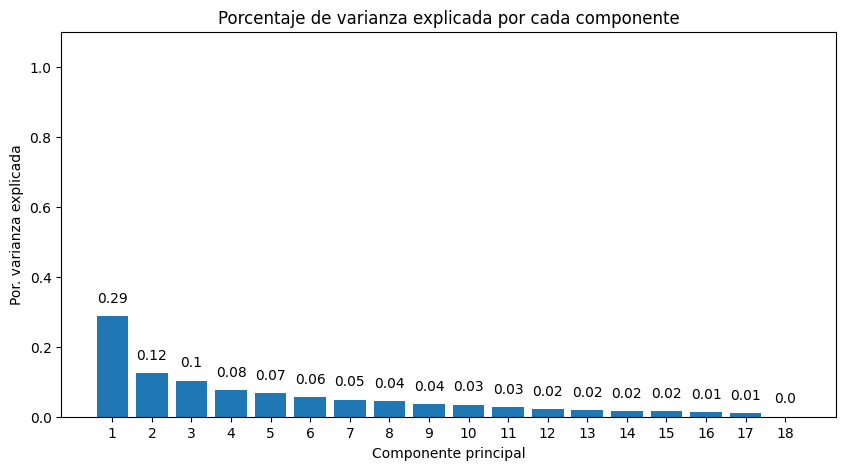

In [28]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1, height=modelo_pca.explained_variance_ratio_)

for i, var_exp in zip(np.arange(len(x.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(var_exp, 2)
    ax.annotate(label, (i, var_exp), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()


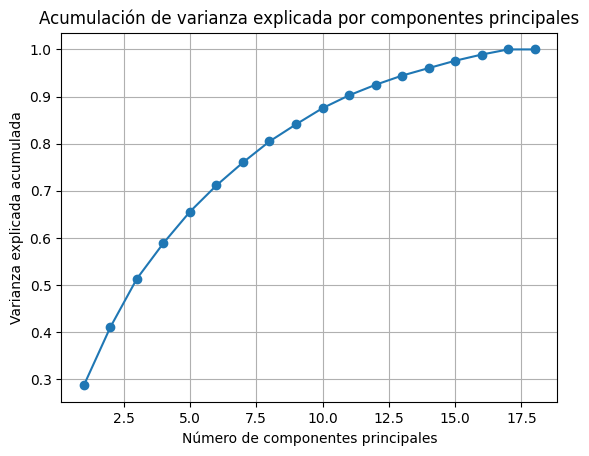

In [29]:
# Calcular la acumulación de varianza explicada
acum_var_exp = np.cumsum(modelo_pca.explained_variance_ratio_)

# Graficar la acumulación de varianza explicada
plt.plot(np.arange(1, len(acum_var_exp) + 1), acum_var_exp, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Acumulación de varianza explicada por componentes principales')
plt.grid(True)
plt.show()

Con **9 componentes principales, obtenemos un 90% de porcentaje de varianza explicada.** 

Por lo tanto, con el objetivo de reducción de dimensionalidad y a la vez de conservación de información relevante, en una primera instancia, tomaremos  las primeras 9 componentes para evaluar el rendimiento de nuestro primer modelo.

## PREDICCIONES PCA

In [30]:
num_componentes = 9
X_pca = modelo_pca.transform(x)[:, :num_componentes]

C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [31]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [32]:
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [33]:
y_pred_pca = regressor_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("Error cuadrático medio (MSE) con 9 PCA:", mse_pca)
print("Coeficiente de determinación (R2) con 9 PCA:", r2_pca)


Error cuadrático medio (MSE) con 9 PCA: 63790978627.08342
Coeficiente de determinación (R2) con 9 PCA: 0.5749726919621397


Con el objetivo de evaluar el modelo considerando mayor cantidad de componentes principales, se realizaron una serie de pruebas considerando diferentes cantidades de componentes principales. 
14 componentes principales fue la cantidad que optimizó los valores de MSE y R2 en nuestro modelo de regresión lineal.

**Aclaración: con 18 pca los valores de MSE y R2 mejoraban muy levemente. Por lo que se decidió optar por 14 con el objetivo de trabajar con menor cantidad de features y reducir la dimensionalidad de nuestro dataset original.**

In [34]:
num_componentes = 14
X_pca = modelo_pca.transform(x)[:, :num_componentes]

C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [35]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42)

In [36]:
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [37]:
y_pred_pca = regressor_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)


print("Error cuadrático medio (MSE) con 14 PCA:", mse_pca)
print("Raíz del error cuadrático medio (RMSE) aplicando 14 PCA:", rmse_pca)
print("Error absoluto:", mae_pca)
print("Coeficiente de determinación (R2) con 14 PCA:", r2_pca)

Error cuadrático medio (MSE) con 14 PCA: 47632432137.06532
Raíz del error cuadrático medio (RMSE) aplicando 14 PCA: 218248.55586478763
Error absoluto: 130142.28545368476
Coeficiente de determinación (R2) con 14 PCA: 0.6826340519893266


# SECUENCIAL FEATURE SELECTOR - CROSS VALIDATION. 

Con el objetivo de obtener un subconjunto óptimo de características (variables predictoras) a partir de un nuestro dataset original, aplicaremos la técnica Sequential Feature Selector (SFS) con Cross Validation.
Esto nos permitirá reducir el riesgo de sobreajuste al eliminar características irrelevantes y al reducir la cantidad de características utilizadas en el modelo, SFS nos ayudará a mejorar la eficiencia computacional y disminuir los requerimientos de memoria.
Utilizaremos el valor de R2 para seleccionar gradualmente un conjunto óptimo de características que mejoren el rendimiento del modelo.

Posteriormente, se compararán los resultados con los valores obtenidos de las predicciones realizadas utilizando las primeras 14 componentes principales. 

En el metodo SFS utilizaremos un rango de 2 a 18 debido con el objetivo de evaluar el modelo de regresión lineal con todas las combinaciones posibles que nos arroje SFS. 


In [38]:
selected_features_list = []

for k_features in range(2, 18):  
    sfs = SFS(LinearRegression(),
              k_features=k_features,
              forward=True,
              floating=False,
              scoring='r2',
              cv=5)
    
    sfs.fit(x, y)
    selected_feature_names = list(sfs.k_feature_names_)
    selected_features_list.append(selected_feature_names)
selected_features_list

[['sqft_living', 'lat'],
 ['sqft_living', 'view', 'lat'],
 ['sqft_living', 'view', 'grade', 'lat'],
 ['sqft_living', 'view', 'grade', 'yr_built', 'lat'],
 ['sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat'],
 ['bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'grade',
  'yr_built',
  'lat'],
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'grade',
  'yr_built',
  'lat'],
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'grade',
  'yr_built',
  'zipcode',
  'lat'],
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'grade',
  'yr_built',
  'zipcode',
  'lat',
  'long'],
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'condition',
  'grade',
  'yr_built',
  'zipcode',
  'lat',
  'long'],
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_basement',
  'yr_built',
  'zipcode',
  'lat',
  'long'],
 ['bedrooms',
  'ba

## PREDICCIONES CON SFS

In [39]:
list_r2_scores_sfs = []
list_mse_scores_sfs = []
list_rmse_scores_sfs = []
list_mae_scores_sfs = []

for selected_feature_names in selected_features_list:
    x_selected = x[selected_feature_names]
    X_train_sfs, X_test_sfs, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
   
    regressor_sfs = LinearRegression()
    regressor_sfs.fit(X_train_sfs, y_train)
    y_pred_sfs = regressor_sfs.predict(X_test_sfs)

    # Metricas
    r2_sfs = r2_score(y_test, y_pred_sfs)
    list_r2_scores_sfs.append(r2_sfs)
    mse_sfs = mean_squared_error(y_test, y_pred_sfs)
    list_mse_scores_sfs.append(mse_sfs)
    rmse_sfs = np.sqrt(mse_sfs)
    list_rmse_scores_sfs.append(rmse_sfs)
    mae_sfs = mean_absolute_error(y_test, y_pred_sfs)
    list_mae_scores_sfs.append(mae_sfs)

results_sfs = pd.DataFrame({
    "MSE": list_mse_scores_sfs,
    "R2": list_r2_scores_sfs,
    "RMSE": list_rmse_scores_sfs,
    "MAE": list_mae_scores_sfs
})

pd.set_option('display.float_format', '{:.3f}'.format)
results_sfs = results_sfs.rename_axis('Selected Features Index')
results_sfs = results_sfs.style.set_properties(**{'text-align': "center" })
results_sfs

,MSE,R2,RMSE,MAE
Selected Features Index,,,,
0,65483399859.290565,0.563696,255897.244728,154540.489119
1,58978773835.868996,0.607036,242855.458732,147052.071874
2,54552979968.564827,0.636524,233565.793661,140316.436966
3,50596909305.542061,0.662882,224937.567573,133311.384466
4,47330457477.754417,0.684646,217555.642257,130722.820461
5,47261177721.102623,0.685108,217396.360874,130246.214206
6,46687911139.102737,0.688927,216073.855751,129309.902267
7,46279267452.176834,0.691650,215126.166359,128936.617026
8,45544068883.584724,0.696548,213410.564133,128554.263001


Podemos observar que las metricas alcanzan sus mejores valores a partir del index 11. Por lo que ya podemos identificar la seleccion de features más optima. Es decir:

In [49]:
fila_11 = results_sfs.data.iloc[11]
print("Lista de features:\n" ,selected_features_list[11])
print("\nMétricas:\n" ,fila_11)

Lista de features:
 ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']

Métricas:
 MSE    45098130404.422
R2               0.700
RMSE        212363.204
MAE         127476.317
Name: 11, dtype: float64


# RANDOM FOREST

In [50]:
X_train_rf, X_test_rf, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

regressor_rf = RandomForestRegressor(random_state=42)
regressor_rf.fit(X_train_rf, y_train)
y_pred_rf = regressor_rf.predict(X_test_rf)

# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# Imprimir las métricas para RandomForestRegressor
print("Métricas para RandomForestRegressor:")
print("Error cuadrático medio (MSE) con RandomForest:", mse_rf)
print("Raíz del error cuadrático medio (RMSE) aplicando random forest:", round(rmse_rf,3))
print("Error absoluto:", round(mae_rf,3))
print("Coeficiente de determinación (R2) con RandomForest:", r2_rf)
print()


Métricas para RandomForestRegressor:
Error cuadrático medio (MSE) con RandomForest: 21392969164.104763
Raíz del error cuadrático medio (RMSE) aplicando random forest: 146263.356
Error absoluto: 72825.476
Coeficiente de determinación (R2) con RandomForest: 0.8574626649340037



# COMPARACION DE MODELOS

In [54]:
comparacion = {
    'Modelo': ['regressor_pca', 'regressor_sfs', 'RandomForestRegressor'],
    'Error Cuadrático Medio (MSE)': [mse_pca, list_mse_scores_sfs[11], mse_rf],
    'Raíz del Error Cuadrático Medio (RMSE)': [rmse_pca, list_rmse_scores_sfs[11], rmse_rf],
    'Error Absoluto (MAE)': [mae_pca, list_mae_scores_sfs[11], mae_rf],
    'Coeficiente de Determinación (R2)': [r2_pca, list_r2_scores_sfs[11], r2_rf]
}

df_resultados = pd.DataFrame(comparacion)

df_resultados.style.format({
    'Error Cuadrático Medio (MSE)': '{:.2f}',
    'Raíz del Error Cuadrático Medio (RMSE)': '{:.2f}',
    'Error Absoluto (MAE)': '{:.2f}',
    'Coeficiente de Determinación (R2)': '{:.2f}'
}).set_properties(**{'text-align': 'center'})

df_resultados

,Modelo,Error Cuadrático Medio (MSE),Raíz del Error Cuadrático Medio (RMSE),Error Absoluto (MAE),Coeficiente de Determinación (R2)
0,regressor_pca,47632432137.065,218248.556,130142.285,0.683
1,regressor_sfs,45098130404.422,212363.204,127476.317,0.700
2,RandomForestRegressor,21392969164.105,146263.356,72825.476,0.857


Comparando los modelos de regresión lineal, el modelo regressor_sfs parece tener un mejor rendimiento en comparación con el modelo regressor_pca para predecir los precios de las casas.

Considerando que el MSE mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales, y que Un MSE más bajo indica un mejor ajuste del modelo a los datos, regressor_sfs posee un mejor MSE. 

En ambos modelos, el coeficiente de determinación posee valores muy parecidos. Esto indica que el 70% de la variabilidad de los precios de las casas se explica a traves de ambos modelos.  El modelo tiene cierta capacidad para explicar y predecir los precios de las casas pero también significa que aproximadamente el 30% de la variabilidad en los datos no se explica por el modelo. Esto implica que todavía hay factores adicionales o fuentes de variabilidad que no se están teniendo en cuenta y que podrían influir en los precios de las casas.

En cuanto al RMSE y el Error absoluto, son metricas que que nos indican qué tan cerca están las predicciones obtenidas de los valores reales. Según las metricas observadas y comparando ambos modelos de regresión lineal, en el regressor_sfs las predicciones están mas cerca de los valores reales. 

Sin embargo, **RandomForestRegressor obtuvo valores superadores en todas las metricas.** Se observan valores inferiores de MSE y MAE. Lo que indica que se generaron prediccion más precisas y cercanas a los valores reales y el R2 es el más alto de todos los modelos (86%), por lo que el modelo explica una mayor cantidad de variabilidad en los datos. 

**Aclaración:**  Cabe destacar que normalmente se exigen valores de MAE, MSE o RMSE muy cercano a cero, pero no siempre es así, ya que en nuestro dataset los precios de las casas están cercanas al millón de dólares y la mayoría por encima de los cientos de miles (10^6, 10^7). tener un MAE en el orden de los 73.000 no es tan descabellado. 

# K-FOLD CROSS-VALIDATION

Si bien el modelo regressor_rf parece performar bien en los datos actuales, aplicar la validación cruzada nos ayudará a realizar una validación más sólida y confiable. 
Con esta técnica buscaremos mitigar los riesgos de sobreajuste (overfitting) y subajuste (underfitting), dos problemas comunes en el desarrollo de modelos. 

In [55]:
scores = cross_val_score(regressor_rf, x, y, cv=5, scoring='r2')
print("\nScores R2 (Validación Cruzada):", scores)
mean_r2 = scores.mean()
print("Promedio R2 (Validación Cruzada):", mean_r2)


Scores R2 (Validación Cruzada): [0.88108599 0.88617888 0.87925262 0.86838663 0.87675648]
Promedio R2 (Validación Cruzada): 0.8783321195346806


Los scores R2 de cada iteración de la validación cruzada tienen valores por encima del 0.86 y al ser un valor cercano a 1 indica un buen ajuste del modelo a esos datos.

El promedio del R2 es 0.87. Lo cual indica que que el modelo generaliza bien y tiene un buen rendimiento en datos no vistos.

Dicho esto, **validaremos este modelo y lo consideraremos como el mejor de los 3. A continuación visualizaremos los resultados obtenidos respecto a los valores reales:**

In [56]:
resultados_rf = pd.DataFrame({
    'Valor Actual': y_test,
    'Valor Predicho': y_pred_rf,
    "Error Absoluto (MAE)": np.abs(y_test - y_pred_rf),
    "Error Cuadrático (MSE)": (y_test - y_pred_rf) ** 2
})

resultados_rf.sort_values(by="Error Absoluto (MAE)", inplace=True)
resultados_rf = resultados_rf.style.set_properties(**{'text-align': 'center'})
resultados_rf

# OPTIMIZACION DE HIPERPARAMETROS - RANDOMIZED SEARCH

In [57]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(regressor_rf, param_distributions=param_grid, n_iter=100, scoring='r2', cv=5, random_state=42)
random_search.fit(X_train_rf, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\TGD Company\AppData\Local\Programs\Python\Python311\Lib\si

Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}

In [61]:
regressor_rf_optimizado = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=40, random_state=42)
regressor_rf_optimizado.fit(X_train_rf, y_train)
y_pred_rf_optimizado = regressor_rf_optimizado.predict(X_test_rf)

#Metricas
mse_rf_optimizado = mean_squared_error(y_test, y_pred_rf_optimizado)
rmse_rf_optimizado = np.sqrt(mse_rf_optimizado)
mae_rf_optimizado = mean_absolute_error(y_test, y_pred_rf_optimizado)
r2_rf_optimizado = r2_score(y_test, y_pred_rf_optimizado)

# Nuevas métricas para RandomForestRegressor optimizado
print("Métricas para RandomForestRegressor:")
print("Error cuadrático medio (MSE) con RandomForest:", mse_rf_optimizado)
print("Raíz del error cuadrático medio (RMSE) aplicando random forest:", round(rmse_rf_optimizado,3))
print("Error absoluto:", round(mae_rf_optimizado,3))
print("Coeficiente de determinación (R2) con RandomForest:", r2_rf_optimizado)
print()

Métricas para RandomForestRegressor:
Error cuadrático medio (MSE) con RandomForest: 21411069166.225048
Raíz del error cuadrático medio (RMSE) aplicando random forest: 146325.217
Error absoluto: 74519.15
Coeficiente de determinación (R2) con RandomForest: 0.8573420680197967



# CONCLUSIONES GENERALES



El modelo RandomForestRegressor con hiperparámetros optimizados arroja métricas muy parecidas a los valores obtenidos previamente sin estos hyperparametros. Esto puede deberse a que el modelo puede estar alcanzando sus límites de rendimiento o debido a variaciones aleatorias en los datos o el proceso de entrenamiento.

RandomForestRegressor obtuvo valores superadores en todas las metricas. Tanto para el modelo optimizado como para el modelo sin hyperparametros optimizados. Respecto a los modelos de regresión lineal se observan valores inferiores de MSE y MAE. Lo que indica que se generaron prediccion más precisas y cercanas a los valores reales y el R2 es el más alto de todos los modelos (86%), por lo que el modelo explica una mayor cantidad de variabilidad en los datos.

**Validaremos este modelo y lo tomaremos como el mejor de los modelos entrenados.**

Mas allá del modelo elegido y de los buenos resultados obtenidos, resultará interesante tener en cuenta las variables obtenidas con secuencial feature selector, para ***conocer el negocio y entender el mercado.*** Ya que gran parte del precio de una casa viene representado por estas variables. 

Es fundamental considerar el tamaño de la propiedad en conjunto con la cantidad de baños y habitaciones de cada casa ('bedrooms', 'bathrooms') Los inversores deben buscar propiedades de un tamaño adecuado para el mercado objetivo, teniendo en cuenta las preferencias de los compradores potenciales.

Evaluar la presencia de frente de agua: La variable 'waterfront' se refiere a si la propiedad está en frente de agua o no. Los inversores deben considerar la presencia de frente de agua en la propiedad, ya que esto puede aumentar significativamente el valor y la demanda.

Prestar atención a la vista: La variable 'view' también tiene una gran influencia en el precio de las casas. Los inversores deben buscar propiedades con vistas impresionantes, como vistas al mar, a la montaña, a un lago, etc.

Se debe considerar la calidad de la propiedad: La variable 'grade' se refiere a la calidad general de la propiedad, por lo que es importante que los inversores se centren en propiedades de alta calidad para maximizar su potencial de reventa.

Como se puede observar, la variable 'lat' tiene una gran influencia en el precio de las casas. Por lo tanto, es importante que los inversores se centren en áreas de King County que tengan una ubicación privilegiada, con buenas conexiones de transporte, acceso a servicios y comodidades cercanas, y atractivos paisajes.

Es necesario comprender la edad de la propiedad, el año en el que fue renovada, su latitud y longitud. Los inversores deben tener en cuenta la edad de la propiedad al evaluar su potencial de inversión. Una propiedad antigua y con una mala ubicación puede requerir más reparaciones y actualizaciones, lo que puede afectar su rentabilidad.